In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

## Load the Data

In [2]:
df = pd.read_csv("data.csv")

In [4]:
df.shape

(9529, 19)

In [5]:
df.head()

,Id,team,name,position,age,appearance,goals,assists,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,position_grouped,minutes_played_median
0,1,Manchester United,Jack Butland,Goalkeeper,30.0,15,0.000000,0.000000,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,Goalkeeper,1304.0
1,2,Manchester United,Tom Heaton,Goalkeeper,37.0,4,0.000000,0.000000,0.616438,0.924658,292,697,84,4,600000,6000000,1,Goalkeeper,292.0
2,5,Manchester United,Harry Maguire,Defender Centre-Back,30.0,68,0.037799,0.000000,0.000000,0.000000,4762,148,27,1,25000000,70000000,2,Defender Centre-Back,4762.0
3,6,Manchester United,Victor Lindelöf,Defender Centre-Back,28.0,70,0.000000,0.032901,0.000000,0.000000,5471,95,19,10,15000000,35000000,2,Defender Centre-Back,5471.0
4,8,Manchester United,Teden Mengi,Defender Centre-Back,21.0,34,0.000000,0.000000,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,Defender Centre-Back,2758.0


## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [6]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,Id,team,name,position,age,appearance,goals,assists,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,position_grouped,minutes_played_median


In [8]:
# Completeness
df.isnull().sum()

Id                       0
team                     0
name                     0
position                 0
age                      0
appearance               0
goals                    0
assists                  0
goals conceded           0
clean sheets             0
minutes played           0
days_injured             0
games_injured            0
award                    0
current_value            0
highest_value            0
position_encoded         0
position_grouped         0
minutes_played_median    0
dtype: int64

In [9]:
# Accurecy types
df.dtypes

Id                         int64
team                      object
name                      object
position                  object
age                      float64
appearance                 int64
goals                    float64
assists                  float64
goals conceded           float64
clean sheets             float64
minutes played             int64
days_injured               int64
games_injured              int64
award                      int64
current_value              int64
highest_value              int64
position_encoded           int64
position_grouped          object
minutes_played_median    float64
dtype: object

In [10]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding
categorical_features = ['position', 'name', 'team']
numeric_features = ['minutes_played_median', 'position_grouped', 'position_encoded','highest_value','current_value','award','games_injured','days_injured','minutes played','clean sheets','goals conceded','assists','goals','appearance','age']

In [11]:
for i in categorical_features:
    print (df[i].value_counts())

position
Defender Centre-Back          1683
Goalkeeper                    1172
midfield-CentralMidfield      1046
Attack Centre-Forward         1011
midfield-DefensiveMidfield     828
Defender Right-Back            808
Defender Left-Back             753
midfield-AttackingMidfield     645
Attack-RightWinger             613
Attack-LeftWinger              591
midfield-LeftMidfield           89
midfield-RightMidfield          88
midfield                        70
Attack-SecondStriker            50
Attack                          49
Defender                        33
Name: count, dtype: int64
name
Paulinho              5
Guilherme             4
Vitinho               4
Wanderson             3
Pedrinho              3
                     ..
Alisson Safira        1
Gabriel Batista       1
Ricardo Fernandes     1
Marco Pereira         1
Alexander Badolato    1
Name: count, Length: 9405, dtype: int64
team
FC Seoul           42
Daegu FC           41
Royal AM FC        40
Gangwon FC         40
Swa

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [13]:
df.head(2)

,Id,team,name,position,age,appearance,goals,assists,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,position_grouped,minutes_played_median
0,1,Manchester United,Jack Butland,Goalkeeper,30.0,15,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,Goalkeeper,1304.0
1,2,Manchester United,Tom Heaton,Goalkeeper,37.0,4,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,Goalkeeper,292.0


In [14]:
# one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [16]:
df.shape

(9529, 9811)

In [18]:
df.head(2)

,Id,age,appearance,goals,assists,goals conceded,clean sheets,minutes played,days_injured,games_injured,...,team_West Ham United,team_Western Sydney Wanderers,team_Western United FC,team_Wigan Athletic,team_Wolfsberger AC,team_Wolverhampton Wanderers,team_Yokohama F. Marinos,team_Yokohama FC,team_Zenit St. Petersburg,team_Ümraniyespor
0,1,30.0,15,0.0,0.0,1.242331,0.207055,1304,510,58,...,False,False,False,False,False,False,False,False,False,False
1,2,37.0,4,0.0,0.0,0.616438,0.924658,292,697,84,...,False,False,False,False,False,False,False,False,False,False


In [19]:
# Calculate the 35th and 75th percentiles of the price
p20 = df['current_value'].quantile(0.20)
p50 = df['current_value'].quantile(0.50)

# Function to categorize prices
def categorize_price(current_value):
    if current_value < p20:
        return 'Average Player'
    elif current_value < p50:
        return 'Good Player'
    else:
        return 'Professional Player'

# Apply the function to create a new column
df['player_leval_category'] = df['current_value'].apply(categorize_price)

df.drop('current_value', axis=1, inplace=True)

# Verify the distribution of the new categories
print(df['player_leval_category'].value_counts())

player_leval_category
Professional Player    5006
Good Player            2862
Average Player         1661
Name: count, dtype: int64


In [20]:
p20 , p50

(200000.0, 700000.0)

In [22]:
encoder = LabelEncoder()
df['player_leval_category_encoded'] = encoder.fit_transform(df['player_leval_category']) 

#### 3. Feature selection

In [24]:
correlation = df_football.corr(numeric_only=True)
print(correlation['player_leval_category_encoded'].sort_values(ascending=False))

player_leval_category_encoded    1.000000
appearance                       0.497586
minutes played                   0.468589
minutes_played_median            0.421660
highest_value                    0.394990
                                   ...   
position_Attack                 -0.126002
goals conceded                  -0.128908
position_midfield               -0.148224
position_Goalkeeper             -0.191665
Id                              -0.480537
Name: player_leval_category_encoded, Length: 9810, dtype: float64


In [25]:
# Set the correlation threshold
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['player_leval_category_encoded']) > \
threshold]['player_leval_category_encoded'].index
selected_features

Index(['Id', 'appearance', 'goals', 'assists', 'minutes played',
       'days_injured', 'games_injured', 'award', 'highest_value',
       'minutes_played_median', 'player_leval_category_encoded'],
      dtype='object')

In [26]:
selected_features = ['appearance', 'minutes played', 'days_injured', 'games_injured',
       'award', 'highest_value', 'player_leval_category_encoded']

In [27]:
df = df[selected_features]
df.head()

,appearance,minutes played,days_injured,games_injured,award,highest_value,player_leval_category_encoded
0,15,1304,510,58,1,22000000,2
1,4,292,697,84,4,6000000,1
2,68,4762,148,27,1,70000000,2
3,70,5471,95,19,10,35000000,2
4,34,2758,47,13,0,2000000,2


#### 4. Prepare train and test data

In [28]:
# Prepare data
X = df.drop(['player_leval_category_encoded'], axis=1)
y = df['player_leval_category_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

In [29]:
X.shape

(9529, 6)

### Buliding the Model

In [30]:
dt_classifier = DecisionTreeClassifier()

In [31]:
rf_classifier = RandomForestClassifier()

In [32]:
param_grid = {
    'max_depth': [3, 16, 6, 7, 10, 15],   # Regularization strength
    'n_estimators':[35, 40, 50, 60,80]
}
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

### Train the Model

In [33]:
# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 16, 6, 7, 10, 15],
                         'n_estimators': [35, 40, 50, 60, 80]},
             scoring='f1_macro', verbose=1)

In [36]:
grid_search.best_params_

{'max_depth': 7, 'n_estimators': 50}

In [37]:
best_model = grid_search.best_estimator_

## Test the Model

In [38]:
# Predict and evaluate the model
y_pred_dt = dt_classifier.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)
y_pred_rf_g = best_model.predict(X_test)

## Evaluating the Model

In [40]:
print(df.columns)


Index(['appearance', 'minutes played', 'days_injured', 'games_injured',
       'award', 'highest_value', 'player_leval_category_encoded'],
      dtype='object')


In [42]:
# our benchmark model
base_model = round(df['player_leval_category_encoded'].value_counts()[1]/df.shape[0]*100, 2)
base_model

30.03

1. Accuracy

In [43]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dt)
accuracy

0.7896117523609654

In [44]:
accuracy = accuracy_score(y_test, y_pred_rf)
accuracy

0.8426023084994754

In [45]:
y_pred_train_dt = dt_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_dt)
accuracy

0.9982946346582711

In [46]:
y_pred_train_rf = rf_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_rf)
accuracy

0.9981634527089073

In [47]:
accuracy = accuracy_score(y_test, y_pred_rf_g)
accuracy

0.8530954879328436

In [48]:
y_pred_train_rf_g = best_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_rf_g)
accuracy

0.8680309589400499

2. Confusion Matrix

In [49]:
conf_matrix = confusion_matrix(y_test, y_pred_rf_g)
conf_matrix

array([[ 235,   51,   27],
       [   0,  375,  188],
       [   0,   14, 1016]])

In [50]:
print(classification_report(y_test,
                      y_pred_rf_g,
                      labels=list(best_model.classes_)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86       313
           1       0.85      0.67      0.75       563
           2       0.83      0.99      0.90      1030

    accuracy                           0.85      1906
   macro avg       0.89      0.80      0.83      1906
weighted avg       0.86      0.85      0.85      1906



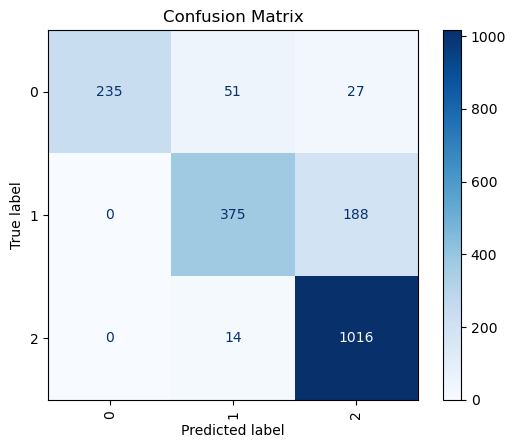

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_g,
                                        display_labels=best_model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

3. Precision

In [52]:
# Calculate Precision
precision = precision_score(y_test, y_pred_rf_g, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.89


4. Recall

In [53]:
# Calculate Recall
recall = recall_score(y_test, y_pred_rf_g, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.80


5. F1 Score

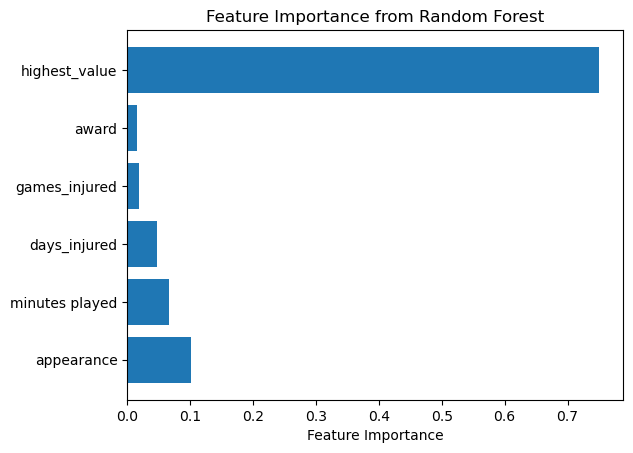

In [54]:
# Feature importance from Random Forest
feature_importances = best_model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()